### DSTA 2019-20 -  Lab 6.l

A simple Jupyter notebook for testing a classifier against the MNIST 784 dataset.

A solution is also available from the Scikit-learn web site.


In [1]:
import time
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

mnist=fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X,y=mnist['data'], mnist['target']
X.shape

(70000, 784)

## Show image

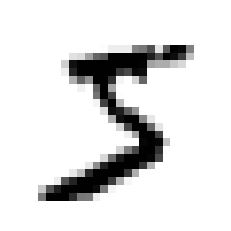

In [3]:
import matplotlib as mpi
import matplotlib.pyplot as plt
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

## Divide the data-set 
* Prepare the dataset by dividing it into train and test set.
* First 6000 is used as training and the rest as test.

In [4]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

## Classification
* Scale $X$ to have zero mean and unit variance [required by regressor]
* Fit the model.
* Find the score.

In [5]:
t0 = time.time()
#scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)


Example run in 6.895 s
Sparsity with L2 penalty: 8.55%
Test score with L2 penalty: 0.9001
['7' '2' '1' ... '4' '5' '6']


## Classification report

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
#get prediction from the classifier
y_pred=clf.predict(X_test)
#print classification report
print (classification_report(
        y_test,
        y_pred
    ))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.93      0.97      0.95      1135
           2       0.92      0.86      0.89      1032
           3       0.88      0.89      0.89      1010
           4       0.88      0.93      0.91       982
           5       0.87      0.83      0.85       892
           6       0.92      0.93      0.93       958
           7       0.89      0.90      0.90      1028
           8       0.88      0.82      0.85       974
           9       0.89      0.87      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



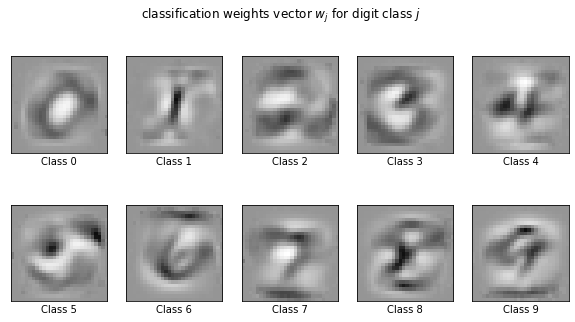

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights vs the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()